**PROJECT OBJECTIVE:** The need is to build a NLP classifier which can use input text parameters to determine the label/s of the blog.

### 1. Import Library and Load Data

In [21]:
import tensorflow as tf
tf.__version__

'2.5.0'

In [22]:
# Importing libraries

from bs4 import BeautifulSoup
from collections import defaultdict
from copy import deepcopy
import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns
import random, re
import time
from tqdm import tqdm
import h5py
import livelossplot
import numpy as np
import os
import pandas as pd
import re
import seaborn as sns
import string
import tensorflow as tf
import unicodedata
from icecream import ic
from string import punctuation

# used to supress display of warnings
import warnings
tqdm.pandas()
warnings.filterwarnings('ignore')
import missingno as mno

# nlp libraries
import nltk
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
stop_words = stopwords.words('english')
from sklearn.feature_extraction.text import TfidfVectorizer
from nltk.stem import WordNetLemmatizer
from nltk import word_tokenize
from nltk.stem.snowball import SnowballStemmer
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer

# import holoviews as hv
# from holoviews import opts

import os;
from os import makedirs

# sampling methods
from sklearn.utils import resample
from imblearn.over_sampling import SMOTE

# import zscore for scaling the data
from scipy.stats import zscore
from scipy.stats import randint as sp_randint

# save models
import pickle

# pre-processing methods
from sklearn.model_selection import train_test_split

# the classification models # ensemble models
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import StackingClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from catboost import CatBoostClassifier
from lightgbm import LGBMClassifier
from xgboost import XGBClassifier

# methods and classes for evaluation
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold

from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix, recall_score, precision_score, roc_auc_score

# cross-validation methods
from sklearn.model_selection import KFold
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

# feature selection methods
from sklearn.pipeline import Pipeline
from sklearn.decomposition import PCA
from sklearn.decomposition import TruncatedSVD
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif
from sklearn.feature_selection import mutual_info_classif
from sklearn.feature_selection import RFE
from sklearn.feature_selection import RFECV

# pre-processing methods
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import PowerTransformer
from sklearn.preprocessing import LabelEncoder

# sampling methods
from sklearn.utils import resample
from imblearn.over_sampling import SMOTE

# import zscore for scaling the data
from scipy.stats import zscore
from scipy.stats import randint as sp_randint

# Deep learning libraries
from tensorflow.keras.layers import Input, Dense, Dropout, BatchNormalization, Activation
from tensorflow.keras.layers import Flatten, LSTM, Embedding, Flatten, Bidirectional, GlobalMaxPool1D
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.models import Sequential
from tensorflow.keras import optimizers
from tensorflow.keras.models import Model
from tensorflow.keras.models import model_from_json
from tensorflow.keras.regularizers import l1, l2, l1_l2
from tensorflow.keras.utils import to_categorical

#from tensorflow.keras.constraints import maxnorm, min_max_norm
from tensorflow.keras.constraints import unit_norm
from tensorflow.keras.callbacks import ReduceLROnPlateau
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.models import model_from_json

from tensorflow.keras.models import load_model
from tensorflow.keras.wrappers.scikit_learn import KerasClassifier

# Keras pre-processing
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
stop_words = stopwords.words('english')
from sklearn.feature_extraction.text import TfidfVectorizer

from wordcloud import WordCloud, STOPWORDS

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Sanvi\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Sanvi\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Sanvi\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [23]:
from sklearn.multiclass import OneVsRestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, classification_report
from sklearn.preprocessing import MultiLabelBinarizer
from random import sample


In [24]:
import holoviews as hv
from holoviews import opts

In [25]:
import numpy as np
np.random.seed(7)

#### i.Utility function to reduce the repeated work

In [26]:
def print_df_shape(_df):
    _row, _col = _df.shape
    
    print("------------------------------------------------")
    print("Number of rows :", _row)
    print("Number of cols :", _col)
    print("------------------------------------------------")

In [27]:
def print_df_nature(_df):
    _num_feature = _df.select_dtypes(exclude = "object")
    _cat_feature = _df.select_dtypes(include = "object")

    print("------------------------------------------------")
    print("Categorical Features :\n\t'{}'".format("', '".join([*_cat_feature])))
    print("Numerical Features   :\n\t'{}'".format("', '".join([*_num_feature])))
    print("------------------------------------------------")

In [28]:
def check_missing_values(_df):
    _isna_sum  = _df.isna().sum()

    print("------------------------------------------------")
    print("\nCount of missing values in each column:\n{}".format(_isna_sum))
    print("------------------------------------------------")

In [29]:
def plot_three_by_four(df, row, col, model='distplot', hue_required=False):
    cols = list(df)
#     print (cols)
    fig = plt.figure(figsize=(20,15))
    fig.tight_layout(h_pad=5)

    _row, _col = row, col
    _next = 1
    for col in cols[:-1]:
        plt.subplot(_row, _col, _next)
        plt.xlabel(col)
        
        if model.lower() == 'scatterplot':
            sns.scatterplot(data = df, x = col, y = 'Signal_Strength', hue = 'Signal_Strength')

        if model.lower() == 'distplot':
            sns.distplot(df[col])
            
        if model.lower() == 'boxplot' and not hue_required:
            sns.boxplot(df[col])
        
        if model.lower() == 'boxplot' and hue_required:
                sns.boxplot(df[col], hue=df['Signal_Strength'])
 
        _next += 1
    print("------------------------------------------------")

In [30]:
def get_details_of_each_column(df):
    cols = list(df)
    for col in cols:
        _head = col.ljust(15, '-')
        print(f"---------------------{_head}---------------------------")        
        _temp_df = []
        _temp_df.append(['Mean'.ljust(20, ' '), df[col].mean()])
        _temp_df.append(['Median'.ljust(20, ' '), df[col].median()])
        _temp_df.append(['Mode'.ljust(20, ' '), df[col].mode().iloc[0]])
        _temp_df.append(['Standard deviation'.ljust(20, ' '), df[col].std()])
        _temp_df.append(['Skewness'.ljust(20, ' '), df[col].skew()])

        result_df = pd.DataFrame(_temp_df, columns = ['Details', 'Values'])
        print(result_df)       
        print("---------------------------------------------------------------\n")

In [31]:
def plot_Skewness_of_each_column(df):
    cols = list(df)
    c = -1
    _color = ["teal", "skyblue", "olive", "gold"]
    fig = plt.figure(figsize=(20,15))
    fig.tight_layout(h_pad=5)

    _row, _col = 4, 4
    _next = 1
    for col in cols[:-1]:
        if c >= 3:
            c = -1
        c += 1
        plt.subplot(_row, _col, _next)
        plt.xlabel(col)
        sns.distplot(df[col], color=_color[c])
        _next += 1
        legend_labels  = ['Ske']
        legend_patches = ["Skewness: %f" % df[col].skew()]
        plt.legend(legend_patches)    

In [32]:
def process_the_data(df):
    df_text = str(df.text).strip()
    
    if not isinstance(df_text, str):
        processed_text = np.nan
    else:

        # Unicode
        _text = unicodedata.normalize('NFKD', df_text).encode('ascii', 'ignore').decode('utf-8', 'ignore')
    #     ic(_text)

        # Remove HTML characters 
        _bs = BeautifulSoup(_text, "html.parser")
        [_str.extract() for _str in _bs(['iframe', 'script'])]
        _text = _bs.get_text()
        _text = re.sub(r'[\r|\n|\r\n]+', '\n', _text)
    
        # Remove special characters 
        pattern = r"[^A-Za-z0-9!?\'\`]"
        _text = re.sub(pattern, ' ', _text)
    #     ic(_text)

        # Remove Stop words 
        stop_words = stopwords.words('english') + list(punctuation) + ['urllink']
        _words = word_tokenize(_text)
        _words = [_word.lower() for _word in _words]
        _words = [_word for _word in _words if _word not in stop_words and not _word.isdigit()]
        words = list(dict.fromkeys(_words))
    #     ic(words)

        # Lemmatization
        _lemma = WordNetLemmatizer()
        _text = ' '.join([_lemma.lemmatize(_word) for _word in words])

        # Stemming
        _stemm = SnowballStemmer('english')
        _words = word_tokenize(_text)
        _stem_words = [_stemm.stem(_word) for _word in _words]
        processed_text = " ".join(_stem_words)

    df['processed_text'] = processed_text

    return df

In [33]:
from sklearn.metrics import accuracy_score, f1_score, average_precision_score, recall_score

def print_predicted_scores(_actuals, _predicted, _average):
    print('-------------- Average Type ', _average, '--------------')
    _score = f1_score(_actuals, _predicted, average=_average)
    print(f'               F1 score: {_score*100: .2f}%')
    _score = average_precision_score(_actuals, _predicted, average=_average)
    print(f'              Avg Precision Score: {_score*100: .2f}%')
    _score = recall_score(_actuals, _predicted, average=_average)
    print(f'               Avg Recall Score: {_score*100: .2f}%')

### 2.Import the data. Analyse the dimensions of the data. Visualise the data

In [34]:
blog_data=pd.read_csv("blogtext.csv")
blog_data.head(5)

,id,gender,age,topic,sign,date,text
0,2059027,male,15,Student,Leo,"14,May,2004","Info has been found (+/- 100 pages,..."
1,2059027,male,15,Student,Leo,"13,May,2004",These are the team members: Drewe...
2,2059027,male,15,Student,Leo,"12,May,2004",In het kader van kernfusie op aarde...
3,2059027,male,15,Student,Leo,"12,May,2004",testing!!! testing!!!
4,3581210,male,33,InvestmentBanking,Aquarius,"11,June,2004",Thanks to Yahoo!'s Toolbar I can ...


In [35]:
# Date Shape
print_df_shape(blog_data)

------------------------------------------------
Number of rows : 681284
Number of cols : 7
------------------------------------------------


- ***Dataset have 681284 rows and 7 columns.***

In [36]:
# This will output the field types
print_df_nature(blog_data)

------------------------------------------------
Categorical Features :
	'gender', 'topic', 'sign', 'date', 'text'
Numerical Features   :
	'id', 'age'
------------------------------------------------


In [37]:
# Missing values
check_missing_values(blog_data)

------------------------------------------------

Count of missing values in each column:
id        0
gender    0
age       0
topic     0
sign      0
date      0
text      0
dtype: int64
------------------------------------------------


- ***As we can see there in no missing value***

In [38]:
# Data Info
print("------------------------------------------------")
blog_data.info()
print("------------------------------------------------")

------------------------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 681284 entries, 0 to 681283
Data columns (total 7 columns):
 #   Column  Non-Null Count   Dtype 
---  ------  --------------   ----- 
 0   id      681284 non-null  int64 
 1   gender  681284 non-null  object
 2   age     681284 non-null  int64 
 3   topic   681284 non-null  object
 4   sign    681284 non-null  object
 5   date    681284 non-null  object
 6   text    681284 non-null  object
dtypes: int64(2), object(5)
memory usage: 36.4+ MB
------------------------------------------------


- ***As we saw above two columns id and age is numeric and rest columns are object type***

In [39]:
# Validating
processed_text = process_the_data(blog_data.iloc[0])
processed_text

id                                                          2059027
gender                                                         male
age                                                              15
topic                                                       Student
sign                                                            Leo
date                                                    14,May,2004
text                         Info has been found (+/- 100 pages,...
processed_text    info found page mb pdf file wait until team le...
Name: 0, dtype: object

In [22]:
# ##To avoid the re-run  this was commented 
# blog_df = blog_data.progress_apply(process_the_data, axis=1)
# blog_df.to_csv('blog_processed.csv', index = False)

100%|██████████| 681284/681284 [50:22<00:00, 225.38it/s]  


- ***process_the_data function basically do the all basic filers in data like, remomving stop word, rare words, apply limitization , steming etc.***
- ***And save the file in current working directory***

In [40]:
# Validate the created dataset
blog_temp=pd.read_csv("blog_processed.csv")
blog_temp.head(5)

,id,gender,age,topic,sign,date,text,processed_text
0,2059027,male,15,Student,Leo,"14,May,2004","Info has been found (+/- 100 pages,...",info found page mb pdf file wait until team le...
1,2059027,male,15,Student,Leo,"13,May,2004",These are the team members: Drewe...,team member drew van der laag mail ruiyu xie b...
2,2059027,male,15,Student,Leo,"12,May,2004",In het kader van kernfusie op aarde...,het kader van kernfusi op aard maak je eigen w...
3,2059027,male,15,Student,Leo,"12,May,2004",testing!!! testing!!!,test
4,3581210,male,33,InvestmentBanking,Aquarius,"11,June,2004",Thanks to Yahoo!'s Toolbar I can ...,thank yahoo 's toolbar captur url popup mean s...


- ***Check the data after applying basic process data conditions***

In [41]:
blog_temp["topic"].value_counts()

indUnk                     251015
Student                    153903
Technology                  42055
Arts                        32449
Education                   29633
Communications-Media        20140
Internet                    16006
Non-Profit                  14700
Engineering                 11653
Law                          9040
Publishing                   7753
Science                      7269
Government                   6907
Consulting                   5862
Religion                     5235
Fashion                      4851
Marketing                    4769
Advertising                  4676
BusinessServices             4500
Banking                      4049
Chemicals                    3928
Telecommunications           3891
Accounting                   3832
Military                     3128
Museums-Libraries            3096
Sports-Recreation            3038
HumanResources               3010
RealEstate                   2870
Transportation               2326
Manufacturing 

- ***Count of words in 'topic' field***
- ***As we can see indUnk have higher count***

<AxesSubplot:>

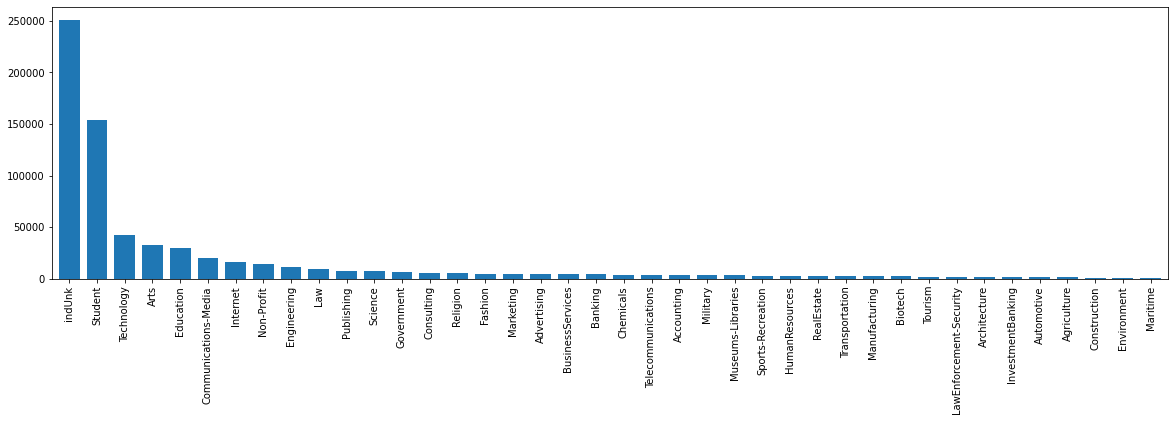

In [42]:
blog_temp['topic'].value_counts().plot(kind='bar', figsize=(20, 5), width=.75)

<AxesSubplot:>

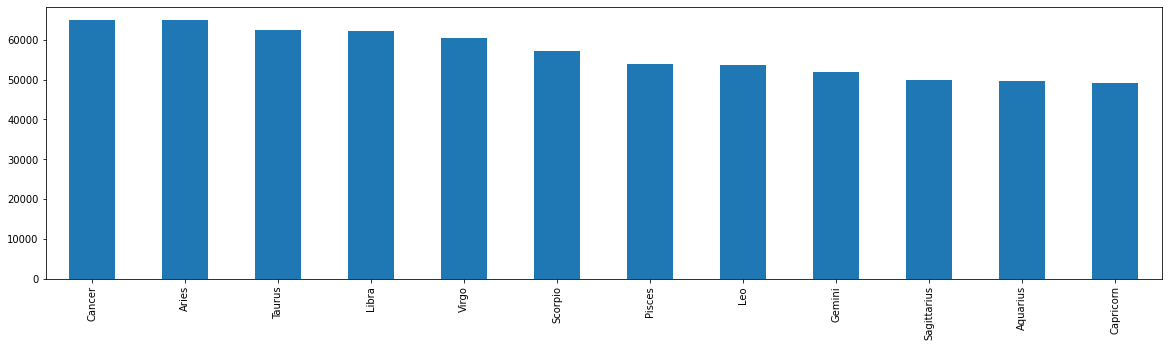

In [43]:
blog_temp['sign'].value_counts().plot(kind='bar', figsize=(20, 5))

- ***As we can see from graph more peoples sign with Cancer and Aries, followed by Taurus, Libra, Virgo and so on***

In [44]:
#to check if any row contain null value
blog_temp.isna().any()

id                False
gender            False
age               False
topic             False
sign              False
date              False
text              False
processed_text     True
dtype: bool

In [45]:
# Missing values
check_missing_values(blog_temp)

------------------------------------------------

Count of missing values in each column:
id                   0
gender               0
age                  0
topic                0
sign                 0
date                 0
text                 0
processed_text    6633
dtype: int64
------------------------------------------------


- ***As we can see processed_text have some null entry***

In [46]:
# Data Info
print("------------------------------------------------")
blog_temp.info()
print("------------------------------------------------")

------------------------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 681284 entries, 0 to 681283
Data columns (total 8 columns):
 #   Column          Non-Null Count   Dtype 
---  ------          --------------   ----- 
 0   id              681284 non-null  int64 
 1   gender          681284 non-null  object
 2   age             681284 non-null  int64 
 3   topic           681284 non-null  object
 4   sign            681284 non-null  object
 5   date            681284 non-null  object
 6   text            681284 non-null  object
 7   processed_text  674651 non-null  object
dtypes: int64(2), object(6)
memory usage: 41.6+ MB
------------------------------------------------


In [47]:
# Before merging the lables, will convert the datatype of 'age' into string
blog_temp['age'] = blog_temp['age'].astype('str')

# Drop 'id' from the data
blog_temp = blog_temp.drop(['id'], axis=1)

# Data Info
print("------------------------------------------------")
blog_temp.info()
print("------------------------------------------------")

------------------------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 681284 entries, 0 to 681283
Data columns (total 7 columns):
 #   Column          Non-Null Count   Dtype 
---  ------          --------------   ----- 
 0   gender          681284 non-null  object
 1   age             681284 non-null  object
 2   topic           681284 non-null  object
 3   sign            681284 non-null  object
 4   date            681284 non-null  object
 5   text            681284 non-null  object
 6   processed_text  674651 non-null  object
dtypes: object(7)
memory usage: 36.4+ MB
------------------------------------------------


In [48]:
blog_temp.head()

,gender,age,topic,sign,date,text,processed_text
0,male,15,Student,Leo,"14,May,2004","Info has been found (+/- 100 pages,...",info found page mb pdf file wait until team le...
1,male,15,Student,Leo,"13,May,2004",These are the team members: Drewe...,team member drew van der laag mail ruiyu xie b...
2,male,15,Student,Leo,"12,May,2004",In het kader van kernfusie op aarde...,het kader van kernfusi op aard maak je eigen w...
3,male,15,Student,Leo,"12,May,2004",testing!!! testing!!!,test
4,male,33,InvestmentBanking,Aquarius,"11,June,2004",Thanks to Yahoo!'s Toolbar I can ...,thank yahoo 's toolbar captur url popup mean s...


In [49]:
# Merging all the labels
blog_temp['labels'] = blog_temp[['gender','age','topic','sign']].values.tolist()

In [50]:
# Data Info
print("------------------------------------------------")
blog_temp.info()
print("------------------------------------------------")

------------------------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 681284 entries, 0 to 681283
Data columns (total 8 columns):
 #   Column          Non-Null Count   Dtype 
---  ------          --------------   ----- 
 0   gender          681284 non-null  object
 1   age             681284 non-null  object
 2   topic           681284 non-null  object
 3   sign            681284 non-null  object
 4   date            681284 non-null  object
 5   text            681284 non-null  object
 6   processed_text  674651 non-null  object
 7   labels          681284 non-null  object
dtypes: object(8)
memory usage: 41.6+ MB
------------------------------------------------


In [51]:
# Top 25 frequent bloggers
blog_temp.labels.astype('str').value_counts()[:25]

['male', '34', 'indUnk', 'Aries']           4712
['female', '23', 'indUnk', 'Aries']         3678
['female', '16', 'Student', 'Libra']        3573
['female', '16', 'Student', 'Aries']        3556
['female', '26', 'indUnk', 'Cancer']        3471
['female', '38', 'indUnk', 'Virgo']         3242
['female', '23', 'indUnk', 'Scorpio']       3013
['female', '34', 'indUnk', 'Cancer']        2989
['female', '17', 'Student', 'Capricorn']    2888
['female', '17', 'Student', 'Libra']        2788
['female', '24', 'indUnk', 'Libra']         2622
['female', '16', 'Student', 'Aquarius']     2618
['female', '24', 'indUnk', 'Aries']         2601
['female', '24', 'Arts', 'Libra']           2585
['male', '25', 'indUnk', 'Leo']             2435
['male', '24', 'indUnk', 'Taurus']          2427
['male', '17', 'Student', 'Cancer']         2315
['male', '35', 'Technology', 'Aries']       2309
['male', '16', 'indUnk', 'Cancer']          2307
['male', '16', 'Student', 'Virgo']          2300
['male', '16', 'Stud

In [52]:
from collections import Counter

# Top 25 frequently used words
_words = (blog_temp.processed_text.str.cat(sep=' ').split())
_count = pd.DataFrame(Counter(_words).most_common(25),
                    columns=['Word', 'Count']).set_index('Word')
_count[:25].transpose()

Word,go,'s,get,n't,like,time,one,think,know,day,...,say,work,realli,look,good,see,would,got,come,feel
Count,363911,343539,305909,295834,287100,253235,252792,228798,226549,217529,...,179185,178219,176159,175748,175647,174386,163832,159581,156554,154579


#### Drop un-used column from data set***

In [53]:
# Drop the unused columns from the data
blog_clean_df = blog_temp.drop(columns = ['gender','age','topic','sign','date', 'text'])

In [54]:
# Data Info
print("------------------------------------------------")
blog_clean_df.info()
print("------------------------------------------------")

------------------------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 681284 entries, 0 to 681283
Data columns (total 2 columns):
 #   Column          Non-Null Count   Dtype 
---  ------          --------------   ----- 
 0   processed_text  674651 non-null  object
 1   labels          681284 non-null  object
dtypes: object(2)
memory usage: 10.4+ MB
------------------------------------------------


In [55]:
blog_clean_df.head()

,processed_text,labels
0,info found page mb pdf file wait until team le...,"[male, 15, Student, Leo]"
1,team member drew van der laag mail ruiyu xie b...,"[male, 15, Student, Leo]"
2,het kader van kernfusi op aard maak je eigen w...,"[male, 15, Student, Leo]"
3,test,"[male, 15, Student, Leo]"
4,thank yahoo 's toolbar captur url popup mean s...,"[male, 33, InvestmentBanking, Aquarius]"


In [56]:
blog_clean_df.isna().sum()

processed_text    6633
labels               0
dtype: int64

### Drop all the null values from processed_text

In [57]:
blog_working_df = blog_clean_df.dropna(how='all')

In [58]:
blog_clean_df = blog_clean_df[blog_clean_df['processed_text'].notna()]

In [59]:
blog_clean_df.isna().sum()

processed_text    0
labels            0
dtype: int64

In [60]:
print_df_shape(blog_clean_df)

------------------------------------------------
Number of rows : 674651
Number of cols : 2
------------------------------------------------


In [61]:
blog_clean_df = blog_clean_df.sample(50000, random_state=1)
blog_clean_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 50000 entries, 515471 to 245590
Data columns (total 2 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   processed_text  50000 non-null  object
 1   labels          50000 non-null  object
dtypes: object(2)
memory usage: 1.1+ MB


In [62]:
print_df_shape(blog_clean_df)

------------------------------------------------
Number of rows : 50000
Number of cols : 2
------------------------------------------------


#### Split the Data into Train and test data set

In [63]:
# Train / Split the data as 80:20
X_train, X_test, y_train, y_test = train_test_split(blog_clean_df['processed_text'], 
                                                    blog_clean_df['labels'], 
                                                    test_size=0.20)

In [64]:
# Data Shape
print("------------------------------------------------")
print("  ", X_train.shape, y_train.shape, X_test.shape, y_test.shape)
print("------------------------------------------------")

------------------------------------------------
   (40000,) (40000,) (10000,) (10000,)
------------------------------------------------


### Vectorisation

In [65]:
# Vectorization
vectorizer = CountVectorizer(analyzer='word',token_pattern=r'\w{1,}',ngram_range=(1,3),stop_words='english',min_df=0.15,max_df=0.8)

In [66]:
X_train_vect = vectorizer.fit_transform(X_train)
X_train_vect.shape

(40000, 38)

In [67]:
X_test_vect = vectorizer.transform(X_test)
X_test_vect.shape

(10000, 38)

In [68]:
vectorizer.get_feature_names()[:10]

['come', 'day', 'feel', 'friend', 'good', 'got', 'know', 'life', 'like', 'll']

In [69]:
print(X_train_vect[:3], vectorizer.get_feature_names()[:3])

  (2, 14)	1
  (2, 26)	1
  (2, 6)	1
  (2, 29)	1
  (2, 2)	1
  (2, 8)	1
  (2, 35)	2
  (2, 28)	2
  (2, 3)	2
  (2, 31)	2
  (2, 22)	1
  (2, 13)	1
  (2, 25)	2
  (2, 4)	1
  (2, 16)	1
  (2, 32)	1
  (2, 21)	1
  (2, 10)	1
  (2, 19)	1
  (2, 33)	1
  (2, 34)	1
  (2, 7)	2
  (2, 12)	1
  (2, 27)	1
  (2, 0)	1
  (2, 20)	1
  (2, 15)	1 ['come', 'day', 'feel']


In [70]:
X_train_vect[0].shape

(1, 38)

In [71]:
pd.DataFrame(data=X_train_vect.toarray(),columns=vectorizer.get_feature_names())

,come,day,feel,friend,good,got,know,life,like,ll,...,think,time,today,tri,u,ve,want,way,work,year
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,1,2,1,0,1,2,1,0,...,2,1,0,2,1,1,1,2,0,0
3,0,0,2,0,0,0,1,0,1,0,...,1,1,0,1,0,1,0,1,1,0
4,0,0,0,0,0,0,2,0,0,0,...,1,0,0,1,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39995,0,0,0,0,0,1,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
39996,0,1,0,0,1,0,2,1,0,0,...,0,1,0,0,1,0,0,0,1,0
39997,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,1,0,1,0,0,1
39998,1,1,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [72]:
pd.DataFrame(data=X_test_vect.toarray(),columns=vectorizer.get_feature_names())

,come,day,feel,friend,good,got,know,life,like,ll,...,think,time,today,tri,u,ve,want,way,work,year
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,1,0,0,0,0,0,...,0,1,1,1,0,0,1,0,0,1
3,0,1,0,1,0,0,0,0,1,0,...,0,1,1,0,0,0,1,0,1,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
9996,1,0,0,0,0,1,0,1,0,1,...,0,1,1,0,0,1,0,0,0,1
9997,0,1,0,0,0,0,0,0,1,0,...,0,0,1,0,0,0,0,0,0,0
9998,0,0,1,0,1,1,1,1,1,1,...,1,1,0,1,1,1,0,0,1,1


In [73]:
# Binarizer
binarizer = MultiLabelBinarizer()

y_train = [[str(i) for i in j] for j in y_train]
y_test = [[str(i) for i in j] for j in y_test]

y_train_lbls = binarizer.fit_transform(y_train)
y_test_lbls = binarizer.transform(y_test)
y_train_lbls.shape, y_test_lbls.shape

((40000, 80), (10000, 80))

In [74]:
y_train_lbls[0]

array([0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0])

### Logistic Regression

In [75]:
# Logistic Regression
lr = LogisticRegression(solver='lbfgs')
lr_ovrc = OneVsRestClassifier(lr, n_jobs=1)


# Using pipeline for applying logistic regression and one vs rest classifier
lr_ovrc_pipeline = Pipeline([('clf', 
                             OneVsRestClassifier(LogisticRegression(solver='sag'),
                                                 n_jobs=-1)),])

lr_ovrc.fit(X_train_vect, y_train_lbls)

OneVsRestClassifier(estimator=LogisticRegression(), n_jobs=1)

In [76]:
y_train_pred = lr_ovrc.predict(X_train_vect)

In [77]:
y_train_pred

array([[0, 0, 0, ..., 0, 0, 1],
       [0, 0, 0, ..., 0, 0, 1],
       [0, 0, 0, ..., 1, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 1],
       [0, 0, 0, ..., 1, 0, 0],
       [0, 0, 0, ..., 1, 0, 0]])

In [78]:
print(classification_report(y_train_lbls, y_train_pred))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00       766
           1       0.00      0.00      0.00      1553
           2       0.00      0.00      0.00      2446
           3       0.00      0.00      0.00      4363
           4       0.00      0.00      0.00      4743
           5       0.00      0.00      0.00      4197
           6       0.00      0.00      0.00      4599
           7       0.00      0.00      0.00      4049
           8       0.00      0.00      0.00      3393
           9       0.00      0.00      0.00      2736
          10       0.00      0.00      0.00      1031
          11       1.00      0.00      0.00      1233
          12       0.00      0.00      0.00      1069
          13       0.00      0.00      0.00       817
          14       0.00      0.00      0.00       581
          15       0.00      0.00      0.00       390
          16       0.00      0.00      0.00       287
          17       0.00    

In [79]:
y_test_pred = lr_ovrc.predict(X_test_vect)

In [80]:
print(classification_report(y_test_lbls, y_test_pred))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00       202
           1       0.00      0.00      0.00       416
           2       1.00      0.00      0.01       541
           3       0.00      0.00      0.00      1080
           4       0.00      0.00      0.00      1151
           5       0.00      0.00      0.00      1098
           6       0.00      0.00      0.00      1200
           7       0.00      0.00      0.00       997
           8       0.00      0.00      0.00       830
           9       0.00      0.00      0.00       689
          10       0.00      0.00      0.00       248
          11       0.00      0.00      0.00       325
          12       0.00      0.00      0.00       243
          13       0.00      0.00      0.00       185
          14       0.00      0.00      0.00       160
          15       0.00      0.00      0.00       132
          16       0.00      0.00      0.00        77
          17       0.00    

In [81]:
print('---------- Accuracy score [on TRAIN data] ----------')
print_predicted_scores(y_train_lbls, y_train_pred, 'micro')
print('')
print_predicted_scores(y_train_lbls, y_train_pred, 'macro')
print('')
print_predicted_scores(y_train_lbls, y_train_pred, 'weighted')
print('----------------------------------------------------')

---------- Accuracy score [on TRAIN data] ----------
-------------- Average Type  micro --------------
               F1 score:  22.77%
              Avg Precision Score:  12.38%
               Avg Recall Score:  14.24%

-------------- Average Type  macro --------------
               F1 score:  1.41%
              Avg Precision Score:  5.10%
               Avg Recall Score:  1.42%

-------------- Average Type  weighted --------------
               F1 score:  14.02%
              Avg Precision Score:  22.53%
               Avg Recall Score:  14.24%
----------------------------------------------------


In [82]:
print('---------- Accuracy score [on TEST data] ----------')
print_predicted_scores(y_test_lbls, y_test_pred, 'micro')
print('')
print_predicted_scores(y_test_lbls, y_test_pred, 'macro')
print('')
print_predicted_scores(y_test_lbls, y_test_pred, 'weighted')
print('----------------------------------------------------')

---------- Accuracy score [on TEST data] ----------
-------------- Average Type  micro --------------
               F1 score:  22.74%
              Avg Precision Score:  12.36%
               Avg Recall Score:  14.21%

-------------- Average Type  macro --------------
               F1 score:  1.41%
              Avg Precision Score:  5.10%
               Avg Recall Score:  1.43%

-------------- Average Type  weighted --------------
               F1 score:  14.01%
              Avg Precision Score:  22.44%
               Avg Recall Score:  14.21%
----------------------------------------------------


### Actual Vs Predicted 

In [83]:
pred_classes = binarizer.inverse_transform(y_test_pred)

for i in sample(range(len(y_test_pred)),  5):
    print(i)
    print("Actual labels   : ", y_test[i])
    print("Predicted labels:", pred_classes[i])
    print()

2021
Actual labels   :  ['female', '16', 'indUnk', 'Capricorn']
Predicted labels: ('female',)

3314
Actual labels   :  ['female', '36', 'indUnk', 'Sagittarius']
Predicted labels: ('female',)

7103
Actual labels   :  ['female', '23', 'Student', 'Capricorn']
Predicted labels: ('female',)

9760
Actual labels   :  ['female', '37', 'indUnk', 'Cancer']
Predicted labels: ('male',)

4434
Actual labels   :  ['male', '37', 'indUnk', 'Leo']
Predicted labels: ('female',)



In [84]:
sample_pred = y_test_pred[100:105]
actual_label = y_test_lbls[100:105]

#### Actual data

In [85]:
actual_label = binarizer.inverse_transform(actual_label)
actual_label

[('24', 'Gemini', 'InvestmentBanking', 'male'),
 ('17', 'Capricorn', 'Student', 'female'),
 ('39', 'Capricorn', 'indUnk', 'male'),
 ('35', 'Capricorn', 'Military', 'male'),
 ('17', 'Non-Profit', 'Virgo', 'female')]

#### Predicted data

In [86]:
sample_pred = binarizer.inverse_transform(sample_pred)
sample_pred

[('male',), ('male',), ('male',), ('male',), ('female',)]